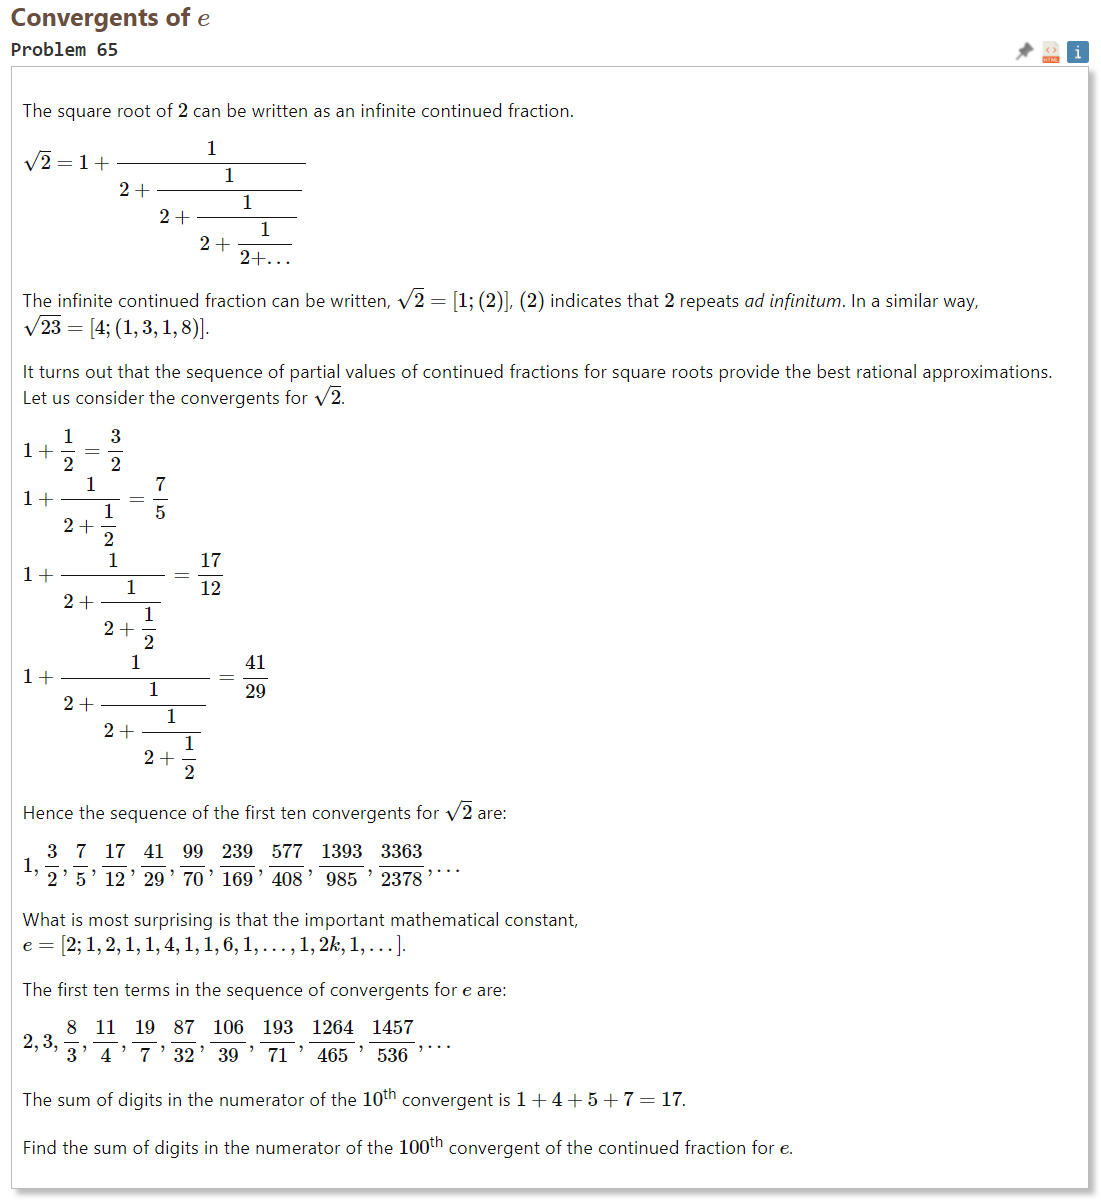

In [99]:
def nth_convergent_of_e(n, m):
    if n == len(m)-1:
        return m[n]
    return m[n] + 1/nth_convergent_of_e(n+1, m)

In [80]:
def calculate_m(d):
    if d == 1:
        return []
    elif d == 2:
        return [1]
    return [1, 2]+[2*(n//3)+2 if n%3==0 else 1 for n in range(1, d-2)]

assert calculate_m(9) == [1, 2, 1, 1, 4, 1, 1, 6]

In [137]:
def calculate_nth_term(n):
    return 2 + 1/nth_convergent_of_e(0, calculate_d(n-2))

assert calculate_nth_term(3) == 8/3
assert calculate_nth_term(4) == 11/4
assert calculate_nth_term(5) == 19/7
assert calculate_nth_term(6) == 87/32
assert calculate_nth_term(7) == 106/39
assert calculate_nth_term(8) == 193/71
assert calculate_nth_term(9) == 1264/465

### As fraction instead of decimal

In [164]:
from math import sqrt
def simplify(numerator, denominator, cf=1):
    if numerator == 1:
        return numerator, denominator, cf
    if denominator%numerator == 0:
        return 1, denominator//numerator, numerator
    # Check what are the factors of numerator, see if denominator shares any
    for possible_divisor in range(2, int(sqrt(numerator))+1):
        if numerator%possible_divisor == 0:
            other_divisor = numerator//possible_divisor
            if denominator%other_divisor == 0:
                new_num, new_den, new_cf = simplify(
                    numerator//other_divisor,
                    denominator//other_divisor
                )
                return new_num, new_den, cf*new_cf*other_divisor
            elif denominator%possible_divisor == 0:
                new_num, new_den, new_cf =  simplify(
                    numerator//possible_divisor,
                    denominator//possible_divisor
                )
                return new_num, new_den, cf*new_cf*possible_divisor
                
    # If they share no factors the fraction is resilient (there exists no a)
    return numerator, denominator, cf

assert simplify(1, 2) == (1, 2, 1)
assert simplify(3, 15) == (1, 5, 3)
assert simplify(2, 3) == (2, 3, 1)
assert simplify(15, 165) == (1, 11, 15)
assert simplify(15, 55) == (3, 11, 5)

In [167]:
def nth_convergent_of_e_frac(n, m):
    if n == len(m)-1:
        return m[n], 1
    num, dem = nth_convergent_of_e_frac(n+1, m)
    num, dem, _ = simplify(m[n]*num+dem, num)
    return num, dem

In [168]:
def calculate_nth_term(n):
    num, dem = nth_convergent_of_e_frac(0, calculate_d(n-2))
    num, dem, _ = simplify(2*num+dem, num)
    return num, dem

assert calculate_nth_term(3) == (8, 3)
assert calculate_nth_term(4) == (11, 4)
assert calculate_nth_term(5) == (19, 7)
assert calculate_nth_term(6) == (87, 32)
assert calculate_nth_term(7) == (106, 39)
assert calculate_nth_term(8) == (193, 71)
assert calculate_nth_term(9) == (1264, 465)

##### I dont think they share any common factors so try with no simplifying

In [169]:
def nth_convergent_of_e_frac_no_simp(n, m):
    if n == len(m)-1:
        return m[n], 1
    num, dem = nth_convergent_of_e_frac_no_simp(n+1, m)
    return m[n]*num+dem, num

In [170]:
def calculate_nth_term_no_simp(n):
    num, dem = nth_convergent_of_e_frac_no_simp(0, calculate_d(n-2))
    return 2*num+dem, num

assert calculate_nth_term_no_simp(3) == (8, 3)
assert calculate_nth_term_no_simp(4) == (11, 4)
assert calculate_nth_term_no_simp(5) == (19, 7)
assert calculate_nth_term_no_simp(6) == (87, 32)
assert calculate_nth_term_no_simp(7) == (106, 39)
assert calculate_nth_term_no_simp(8) == (193, 71)
assert calculate_nth_term_no_simp(9) == (1264, 465)

In [171]:
num, dem = calculate_nth_term_no_simp(100)

In [173]:
sum([int(n) for n in str(num)])

272